In [1]:
import itertools
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
import math

In [2]:
model = load_model('models/fruits_classification.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 256)     147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 512)      0

In [9]:
image=cv2.imread("input/apple/-half-and-green-apple-leaf-isolated-on-white-background-apples-and-699645961.jpg")
resize=cv2.resize(image,(256,256))

plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))

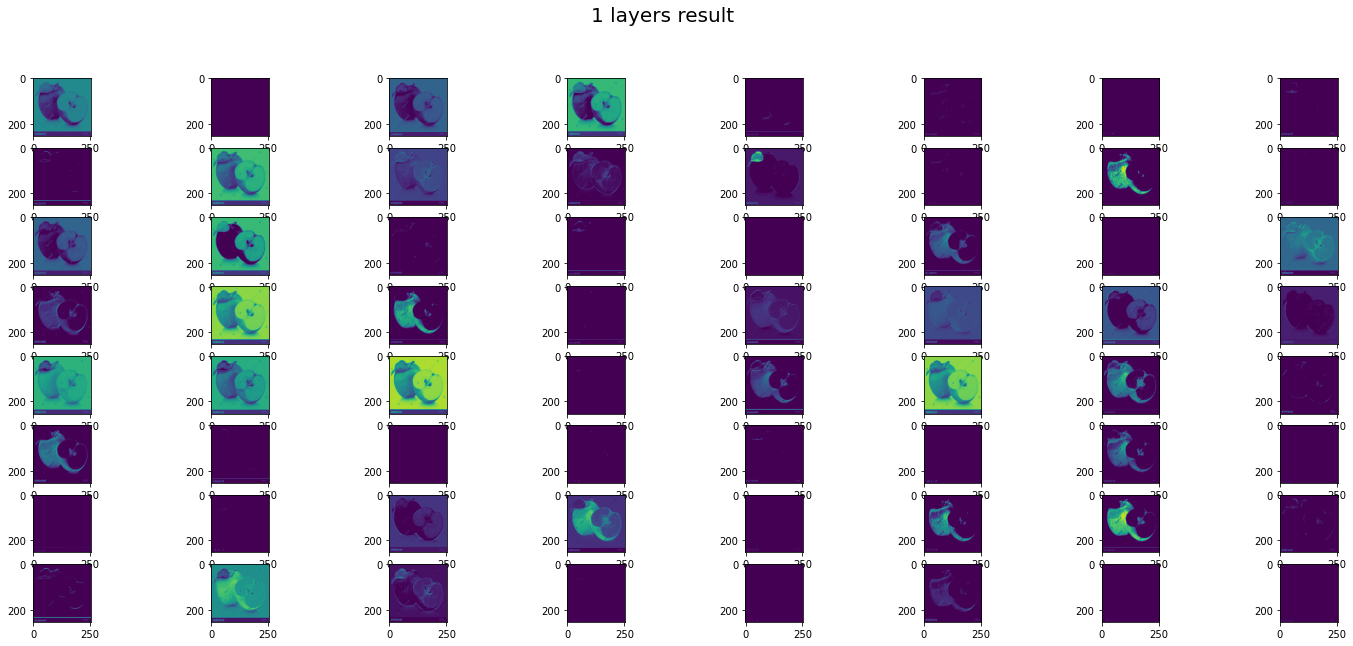

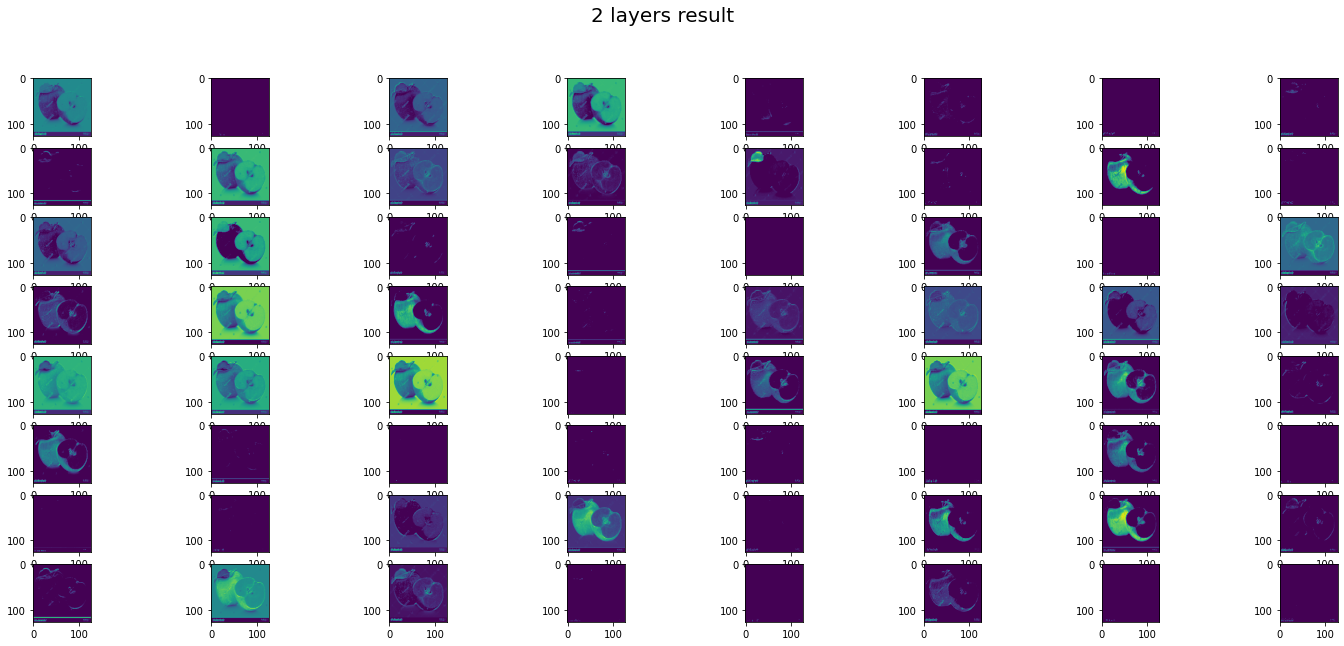

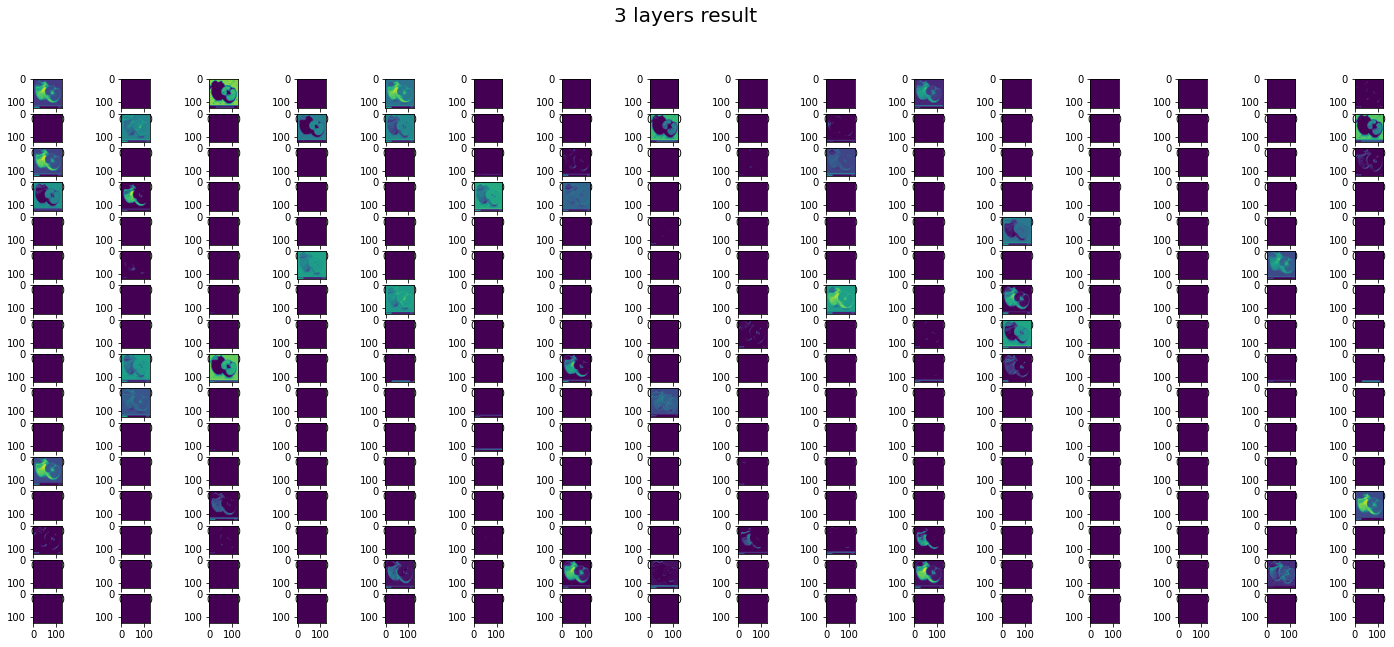

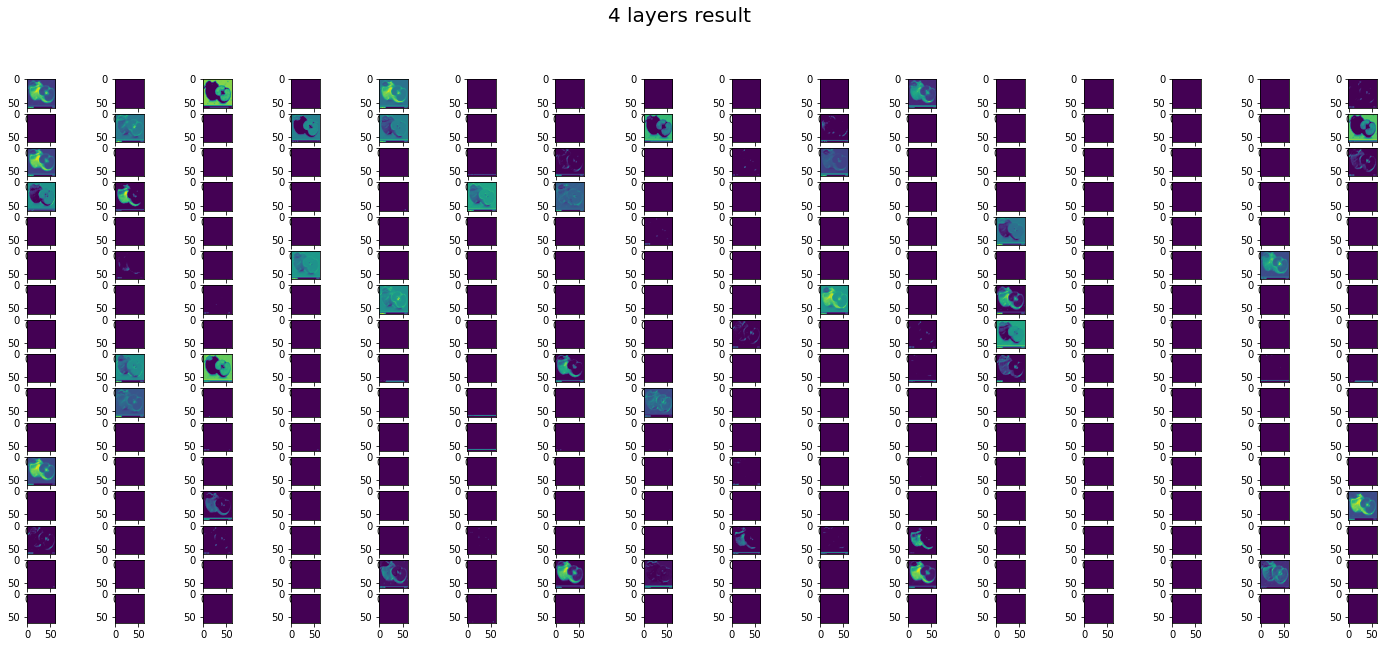

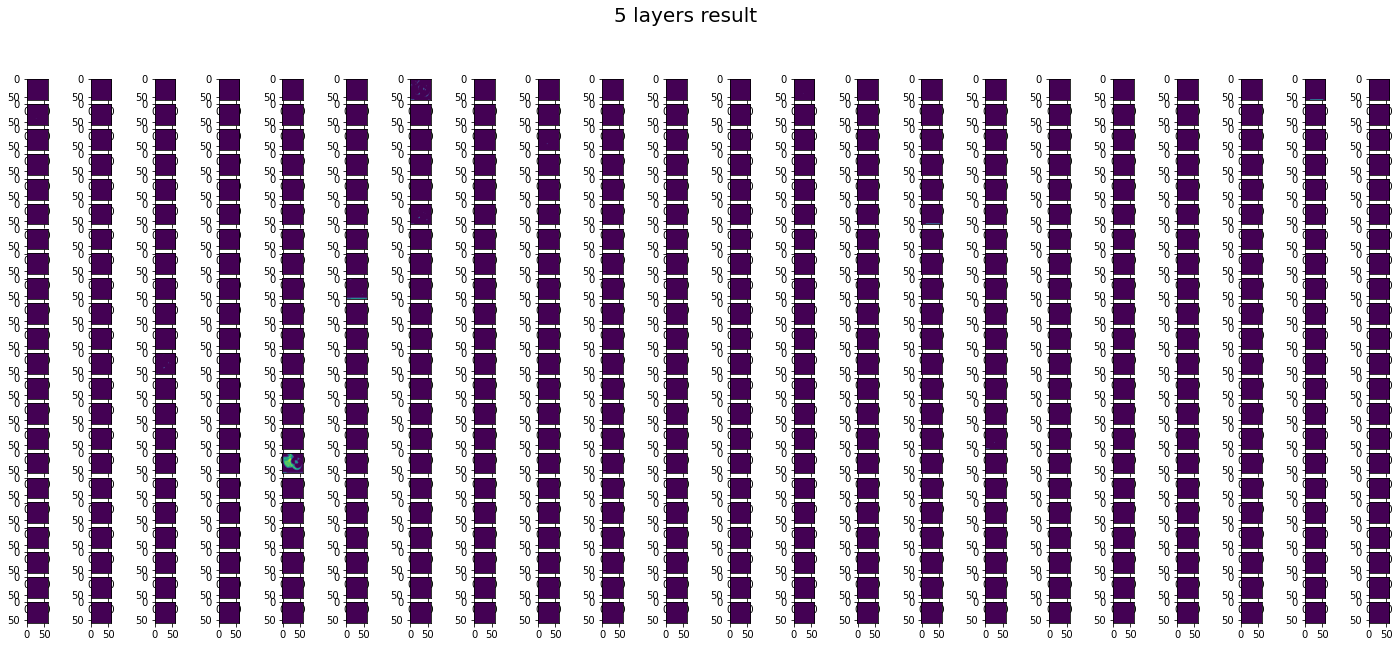

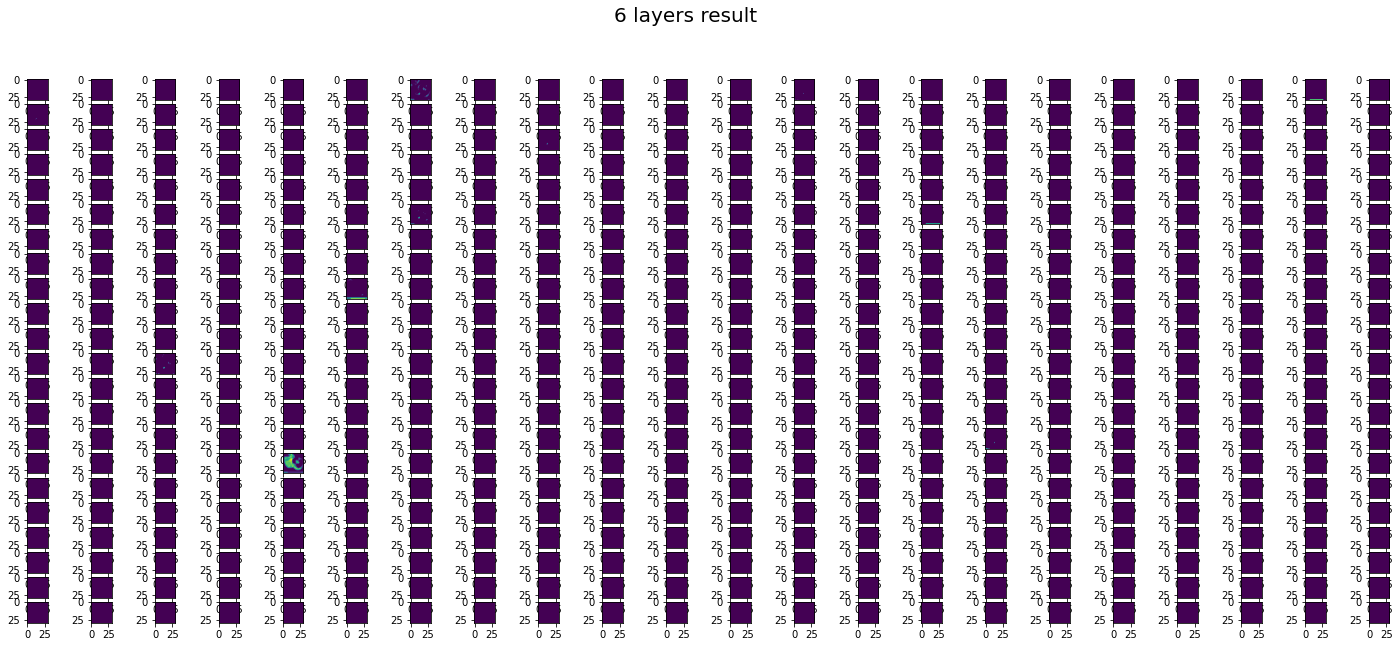

In [70]:
#img result of each intermediate_model.summary()
for i in range(len(model.layers)-3):
  intermediate_layers = model.layers[:(i+1)]
  intermediate_model = Sequential(intermediate_layers)
  yhat = intermediate_model.predict(np.expand_dims(resize,0))

  num_rows = int(math.sqrt(yhat.shape[3]))
  num_cols = int(math.sqrt(yhat.shape[3]))
  fig, ax =plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(25,10))

  #show every frames of each layers
  for idx, ax_idx in enumerate(list(itertools.product(range(num_cols), range(num_rows)))):
    ax[ax_idx[1], ax_idx[0]].imshow(yhat[0, :, :, idx])
  fig.suptitle(f'{i+1} layers result', fontsize=20)